# General Information
Created by :
- Marsoni David
- Zanya Fernandez Rodriguez

Group : DM_ZF

In [142]:
# install required packages
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install prettytable
%pip install colorama
%pip install scikit-learn
%pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [143]:
# Import required libraries

# General libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
from colorama import Fore, Style
from scipy.stats import norm
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

# Scikit-learn libraries
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score, accuracy_score, 
    classification_report, confusion_matrix, silhouette_score, 
    precision_score, recall_score, f1_score, auc, roc_curve
)
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

In [144]:
# Constants for the notebook
RANDOM_STATE = 42 # Random state for reproducibility
TEST_SIZE = 0.3   # Test size for train-test split

# 2.2 Data understanding
TODO

In [145]:
# load data from csv file
file_name = 'Life_Expectancy_Data.csv'
df = pd.read_csv(file_name)

In [146]:
# Strip any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

# Information about the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

# 2.3 Data preparation
## 2.3.1 Missing values and duplicates

In [147]:
# check for missing values
null_counts = df.isnull().sum()
print("\nNull values in each column:")
for column, count in null_counts.items():
    print(f"{column}: {count}")

# check for duplicate rows
duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)


Null values in each column:
Country: 0
Year: 0
Status: 0
Life expectancy: 10
Adult Mortality: 10
infant deaths: 0
Alcohol: 194
percentage expenditure: 0
Hepatitis B: 553
Measles: 0
BMI: 34
under-five deaths: 0
Polio: 19
Total expenditure: 226
Diphtheria: 19
HIV/AIDS: 0
GDP: 448
Population: 652
thinness  1-19 years: 34
thinness 5-9 years: 34
Income composition of resources: 167
Schooling: 163

Number of duplicate rows: 0


In [ ]:
def handle_missing_values(df):
    # Loop through each column
    for column in df.columns:
        # Check if column has any missing values
        if df[column].isnull().any():
            # For numeric columns, use mean
            if df[column].dtype.kind in 'iufc': # i - integer, u - unsigned integer, f - float, c - complex
                fill_value = df[column].mean()
                df[column] = df[column].fillna(fill_value)
            # For string/object columns, use mode (most frequent)
            else:
                fill_value = df[column].mode()[0]
                df[column] = df[column].fillna(fill_value)
    
    return df

df = handle_missing_values(df)

print(df.isnull().sum())

## 2.3.2 Outliers

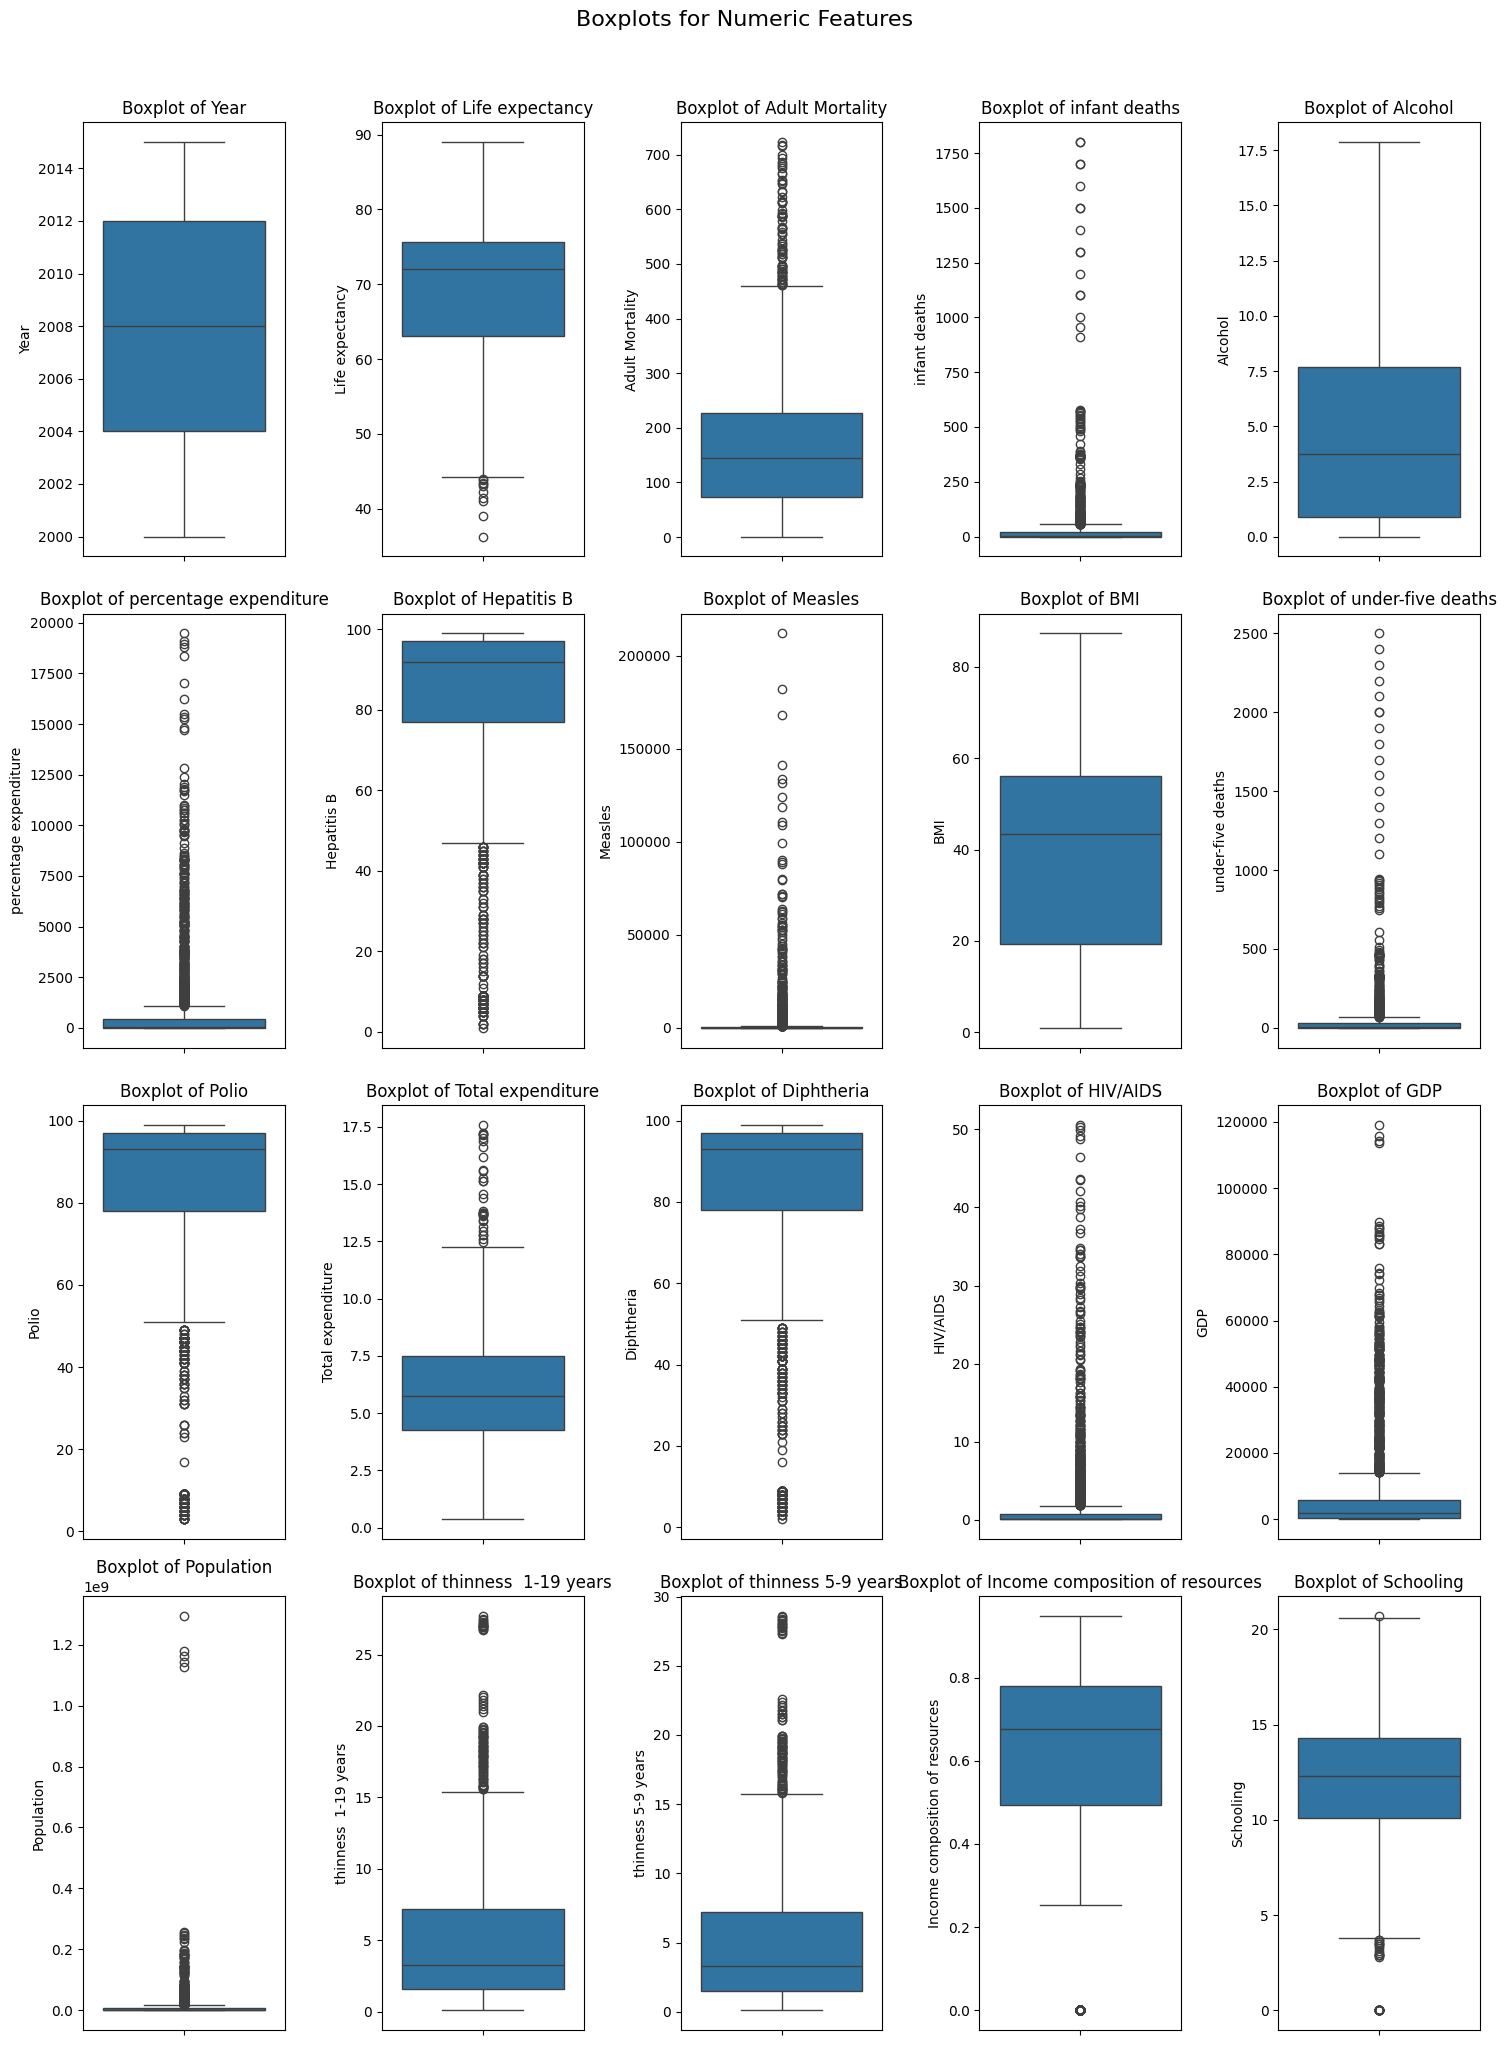


Outliers found:

Life expectancy:
Number of outliers: 10
Outlier values: [36.3 44.  43.5 43.1 43.3 42.3 41.5 41.  39.  43.8]

Adult Mortality:
Number of outliers: 82
Outlier values: [491. 566. 652. 693. 699. 679. 647. 466. 472. 473. 473. 467. 461. 477.
 495. 511. 512. 593. 682. 484. 522. 518. 513. 527. 566. 592. 633. 654.
 675. 666. 648. 622. 586. 543. 462. 491. 525. 559. 587. 615. 613. 599.
 588. 477. 483. 471. 463. 464. 496. 513. 519. 533. 473. 486. 496. 498.
 497. 485. 477. 564. 587. 568. 536. 485. 523. 539. 554. 487. 526. 554.
 578. 611. 614. 464. 527. 587. 632. 717. 723. 715. 686. 665.]

infant deaths:
Number of outliers: 315
Outlier values: [  62   64   66   69   71   74   77   80   82   84   85   87   87   88
   88   88   66   67   69   72   75   78   81   84   87   90   92   94
   95   96   97   97   92   98  104  111  118  126  135  144  154  164
  174  185  196  207  219  231   57   61   65   70   75   81   88   95
  103  111   57   58   59   59   60   60   60   60   61   62

In [148]:
def plot_boxplots_and_find_outliers(df):
    # Get numeric columns
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
    n_cols = 5
    n_rows = (len(numeric_cols) - 1) // n_cols + 1
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    fig.suptitle('Boxplots for Numeric Features', fontsize=16, y=1.02)
    
    axes = axes.flatten()
    outliers_dict = {}
    
    for i, col in enumerate(numeric_cols):
        # Create boxplot
        sns.boxplot(data=df, y=col, ax=axes[i])
        axes[i].set_title(f'Boxplot of {col}')
        axes[i].tick_params(axis='x', rotation=45)
        
        # Calculate outliers
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Store outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        if not outliers.empty:
            outliers_dict[col] = outliers.values
    
    # Remove empty subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()
    
    # Print outliers
    print("\nOutliers found:")
    for col, values in outliers_dict.items():
        print(f"\n{col}:")
        print(f"Number of outliers: {len(values)}")
        print(f"Outlier values: {values}")

# Usage
plot_boxplots_and_find_outliers(df)

In [149]:
# Outliner treatment
def handle_outliers(df):
    # Get numeric columns
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
    for col in numeric_cols:
        # Calculate outliers
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Replace outliers with mean
        df[col] = np.where(df[col] < lower_bound, df[col].mean(), df[col])
    
    return df

df = handle_outliers(df)

## 2.3.3 Data correlation

In [150]:
def correlationMatrix(data, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(data.corr(), annot=False, cmap='coolwarm', fmt='.2f')
    plt.title(title)
    plt.show()

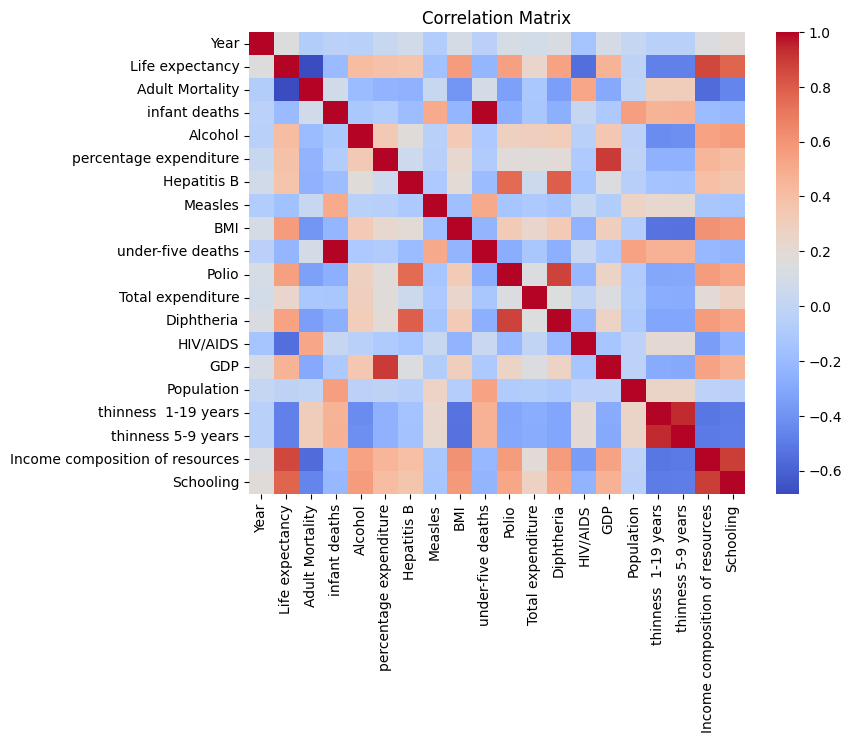

In [151]:
# Store original data
df_original = df.copy()

# Create and display correlation matrix
numeric_df = df.select_dtypes(include=[np.number])
correlationMatrix(numeric_df, 'Correlation Matrix') 
# Restore original data
df = df_original.copy()

In [152]:
# Store original data
df_original = df.copy()

# Convert string values to unique numbers
for column in df.columns:
    if df[column].dtype == 'object':
        df[column], _ = pd.factorize(df[column])

# Calculate correlation with the target variable
target_column = 'Life expectancy'
correlation_with_target = df.corr()[target_column].sort_values(ascending=False)

# Display the correlation with the target variable
print("Correlation with target variable:")
print(correlation_with_target)


# Restore original data
df = df_original.copy()

Correlation with target variable:
Life expectancy                    1.000000
Income composition of resources    0.862507
Schooling                          0.770425
BMI                                0.567046
Polio                              0.548360
Diphtheria                         0.544518
Status                             0.484603
GDP                                0.463436
Alcohol                            0.407684
percentage expenditure             0.383889
Hepatitis B                        0.369293
Total expenditure                  0.237323
Year                               0.162228
Country                           -0.007229
Population                        -0.023240
Measles                           -0.159015
infant deaths                     -0.199006
under-five deaths                 -0.224680
thinness 5-9 years                -0.475220
thinness  1-19 years              -0.480750
HIV/AIDS                          -0.548693
Adult Mortality                   -0.68540

# Data preprocessing 
TODO

In [153]:

# remove to high correlated columns with the target column and between them
df = df.drop(columns=['Income composition of resources'])

# Remove the under five mortality column because very high correlation with the infant deaths column
df = df.drop(columns=['under-five deaths'])

# Remove the Diphtheria column because very high correlation with the Polio column
df = df.drop(columns=['Diphtheria'])

# Remove the pourcentage expenditure column because very high correlation with the GDP column
df = df.drop(columns=['percentage expenditure'])

# Remove the thinness 5-9 years column because very high correlation with the thinness 1-19 years column
df = df.drop(columns=['thinness 5-9 years'])

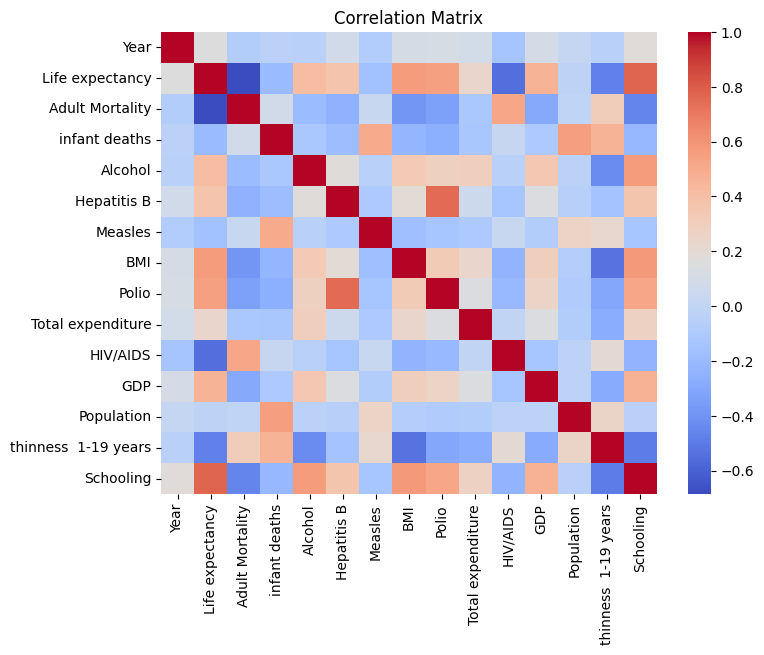

In [154]:
## show again the correlation matrix after removing the columns
# Store original data
df_original = df.copy()

# Create and display correlation matrix
numeric_df = df.select_dtypes(include=[np.number])
correlationMatrix(numeric_df, 'Correlation Matrix')

# Restore original data
df = df_original.copy()

In [94]:
## convert string columns to numeric
for column in df.columns:
    if df[column].dtype == 'object':
        df[column], _ = pd.factorize(df[column])
        
## create the target and features
features = df.drop(columns=['Life expectancy'])
target = df['Life expectancy']

## print the 5 first rows of the features
print(features.head())

   Country    Year  Status  Adult Mortality  infant deaths  Alcohol  \
0        0  2015.0       0            263.0           62.0     0.01   
1        0  2014.0       0            271.0           64.0     0.01   
2        0  2013.0       0            268.0           66.0     0.01   
3        0  2012.0       0            272.0           69.0     0.01   
4        0  2011.0       0            275.0           71.0     0.01   

   Hepatitis B  Measles   BMI      Polio  Total expenditure  Diphtheria  \
0         65.0   1154.0  19.1  82.550188               8.16        65.0   
1         62.0    492.0  18.6  58.000000               8.18        62.0   
2         64.0    430.0  18.1  62.000000               8.13        64.0   
3         67.0   2787.0  17.6  67.000000               8.52        67.0   
4         68.0   3013.0  17.2  68.000000               7.87        68.0   

   HIV/AIDS         GDP  Population  thinness  1-19 years  Schooling  
0       0.1  584.259210  33736494.0                

# Modelling

## Classification

### Create a new feature for binary classification

Mean (Average Life Expectancy): 69.38
Median (Threshold): 72.00
High_Life_Expectancy
False    1472
True     1466
Name: count, dtype: int64


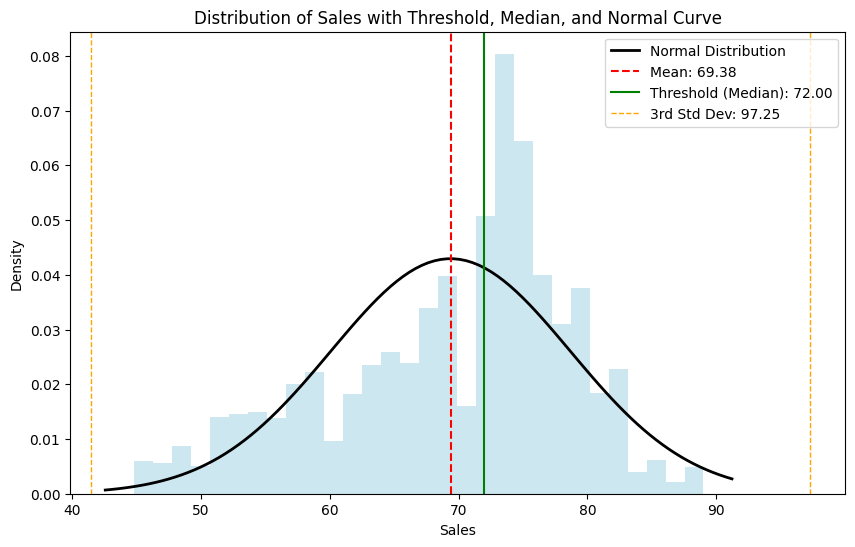

In [114]:
# Calculate the mean
mean = target.mean()

# Calculate the median
median = target.median()

# Use the median as the threshold
threshold = median

# Convert the target variable into binary classes
df['High_Life_Expectancy'] = df['Life expectancy'] > threshold

# Display relevant information
print(f"Mean (Average Life Expectancy): {mean:.2f}")
print(f"Median (Threshold): {median:.2f}")
print(df['High_Life_Expectancy'].value_counts())

# Plot the distribution of sales, the threshold, and the median
plt.figure(figsize=(10, 6))
# Histogram
plt.hist(df['Life expectancy'], bins=30, density=True, alpha=0.6, color='lightblue')

# Add normal distribution curve
mu, std = norm.fit(df['Life expectancy'])
xmin, xmax = plt.xlim() 
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

# Add threshold and median lines
plt.axvline(mean, color='r', linestyle='--', label=f'Mean: {mean:.2f}')
plt.axvline(median, color='g', linestyle='-', label=f'Threshold (Median): {median:.2f}')

# Add standard deviation lines
plt.axvline(mean + 3*std, color='orange', linestyle='--', label=f'3rd Std Dev: {mean + 3*std:.2f}', linewidth=1)
plt.axvline(mean - 3*std, color='orange', linestyle='--',linewidth=1)

# Labels and title
plt.xlabel('Sales')
plt.ylabel('Density')
plt.title('Distribution of Sales with Threshold, Median, and Normal Curve')
plt.legend()
plt.show()

In [96]:
target_classified = df['High_Life_Expectancy']

### train some classification models 

In [106]:
def evaluate_classifier(model, model_name, classification_results, show_normalized=True):
    """
    Evaluate a classifier model on all features at once, make predictions, calculate performance metrics,
    and visualize the confusion matrix and ROC curve. Trains only once, removing the per-feature plotting.
    """
    # Prepare data
    X = features  # All features at once
    y = target_classified

    scaler = StandardScaler()
    if show_normalized:
        X_data = scaler.fit_transform(X)
    else:
        X_data = X

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_data, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
    )

    # Fit model on all features
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)

    # Force classification_report to include both 0 and 1 labels
    report = classification_report(y_test, y_pred, labels=[0, 1], output_dict=True)

    if "1" in report:
        precision = report["1"]["precision"]
        recall = report["1"]["recall"]
        f1 = report["1"]["f1-score"]
    else:
        precision = recall = f1 = 0.0

    cv_score = cross_val_score(model, X_data, y, cv=5).mean()

    # Add row to classification_results
    classification_results.add_row(
        ["All features", model_name, round(accuracy, 3),
         round(precision, 3), round(recall, 3),
         round(f1, 3), round(cv_score, 3)]
    )

    # Create one figure with two subplots: confusion matrix text and ROC curve
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    table = PrettyTable()
    table.title = f'Confusion Matrix ({model_name})'
    table.field_names = ['Actual \\ Predicted', 'Low Sales', 'High Sales', 'Total']
    table.add_row(['Low Sales', cm[0, 0], cm[0, 1], cm[0, 0] + cm[0, 1]])
    table.add_row(['High Sales', cm[1, 0], cm[1, 1], cm[1, 0] + cm[1, 1]])
    table.add_row(['Total', cm[0, 0] + cm[1, 0], cm[0, 1] + cm[1, 1], cm.sum()])

    display_results = PrettyTable()
    display_results.field_names = ["Accuracy", "Precision", "Recall", "F1", "CV Score"]
    display_results.add_row([
        round(accuracy, 3), round(precision, 3),
        round(recall, 3), round(f1, 3), round(cv_score, 3)
    ])

    # Show confusion matrix and metrics as text
    axes[0].axis('off')
    axes[0].text(
        0.5, 0.6, str(table),
        horizontalalignment='center', verticalalignment='center',
        fontsize=11, family='monospace'
    )
    axes[0].text(
        0.5, 0.3, str(display_results),
        horizontalalignment='center', verticalalignment='center',
        fontsize=11, family='monospace'
    )
    axes[0].set_title("Confusion Matrix & Stats")

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.2f})')
    axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[1].set_xlim([0.0, 1.0])
    axes[1].set_ylim([0.0, 1.05])
    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')
    axes[1].set_title(f'ROC Curve ({model_name})')
    axes[1].legend(loc="lower right")

    plt.suptitle(f"{model_name} - Model Evaluation on All Features", fontsize=16, y=0.98)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    return classification_results

In [107]:
# Create results DataFrame with model column
classification_results = PrettyTable()
classification_results.field_names = ['Feature', 'Model', 'Accuracy', 'Precision (sensitivity)', 'Recall (specificity)', 'F1', 'CV_Score']

Unique in y_test: [False  True]
Unique in y_pred: [False  True]


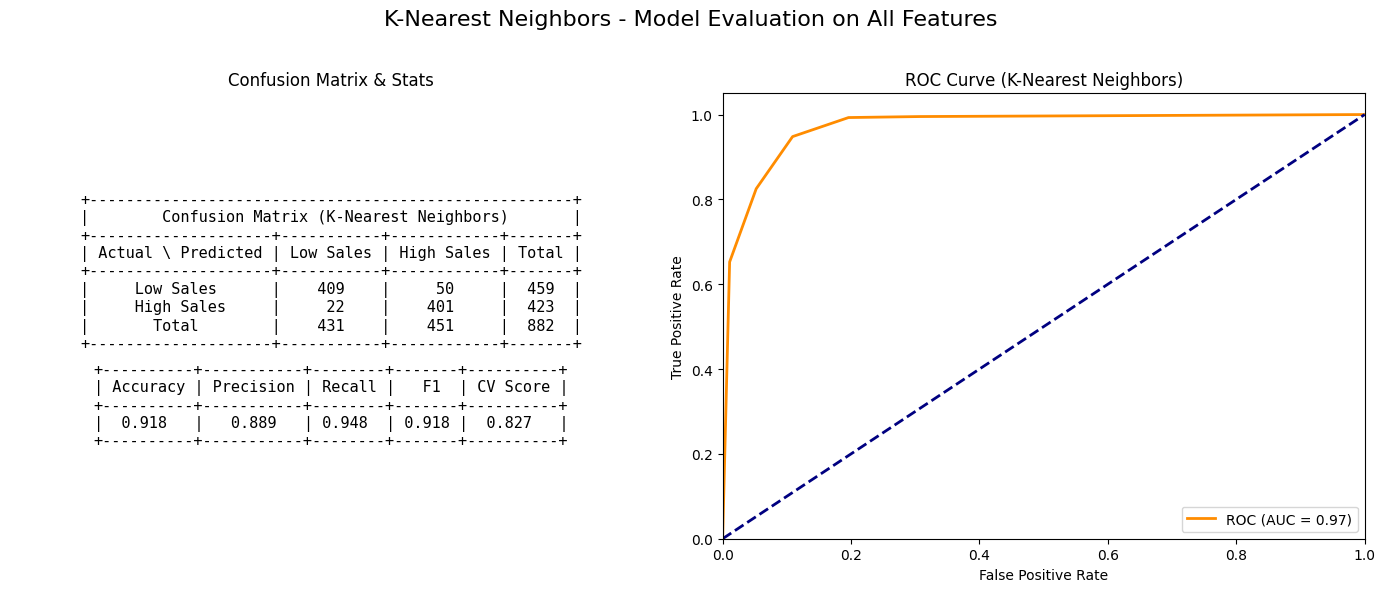

Unique in y_test: [False  True]
Unique in y_pred: [False  True]


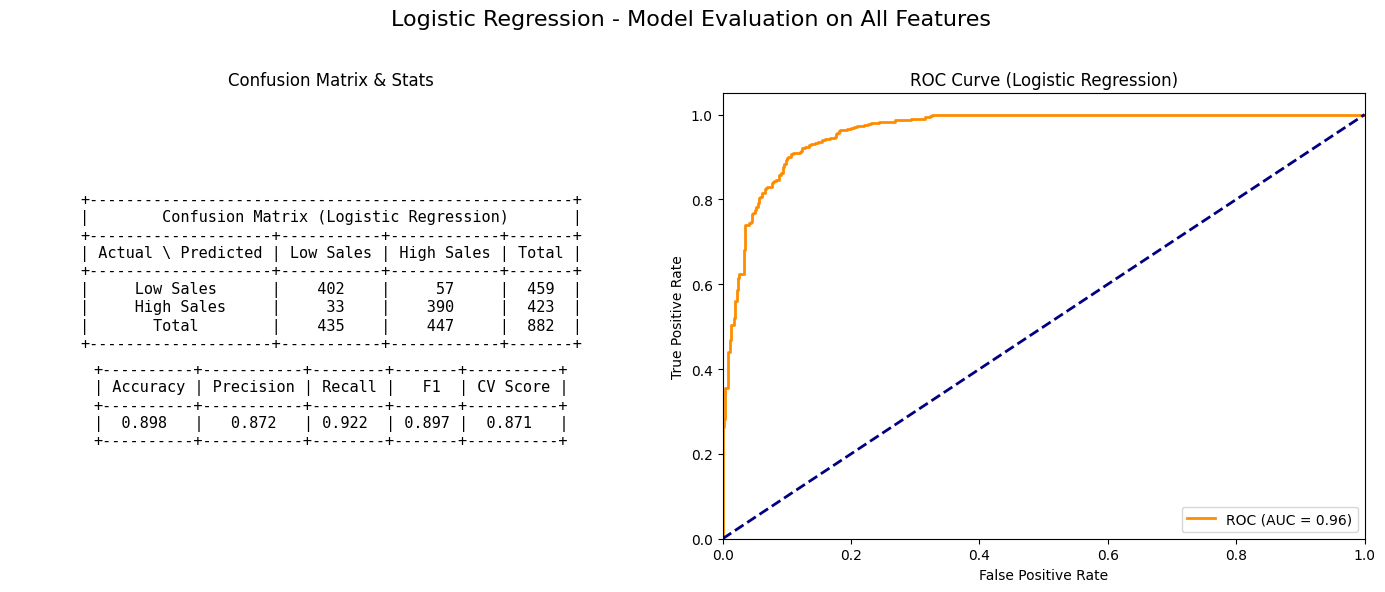

Unique in y_test: [False  True]
Unique in y_pred: [False  True]


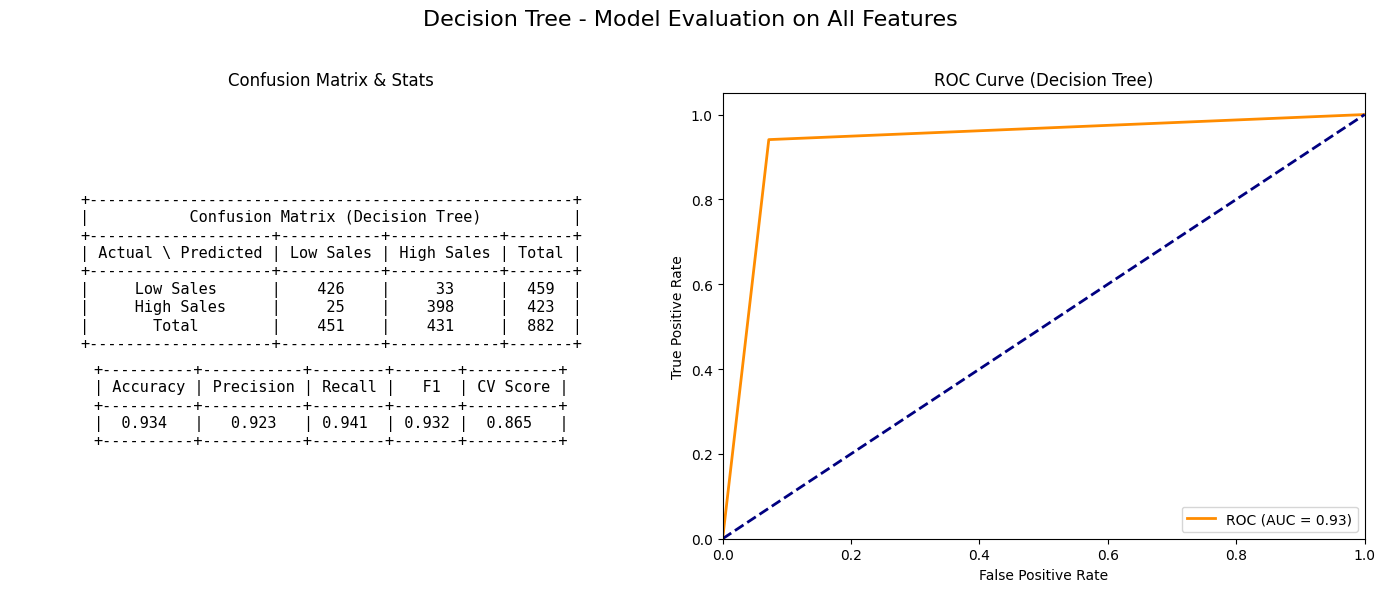

Unique in y_test: [False  True]
Unique in y_pred: [False  True]


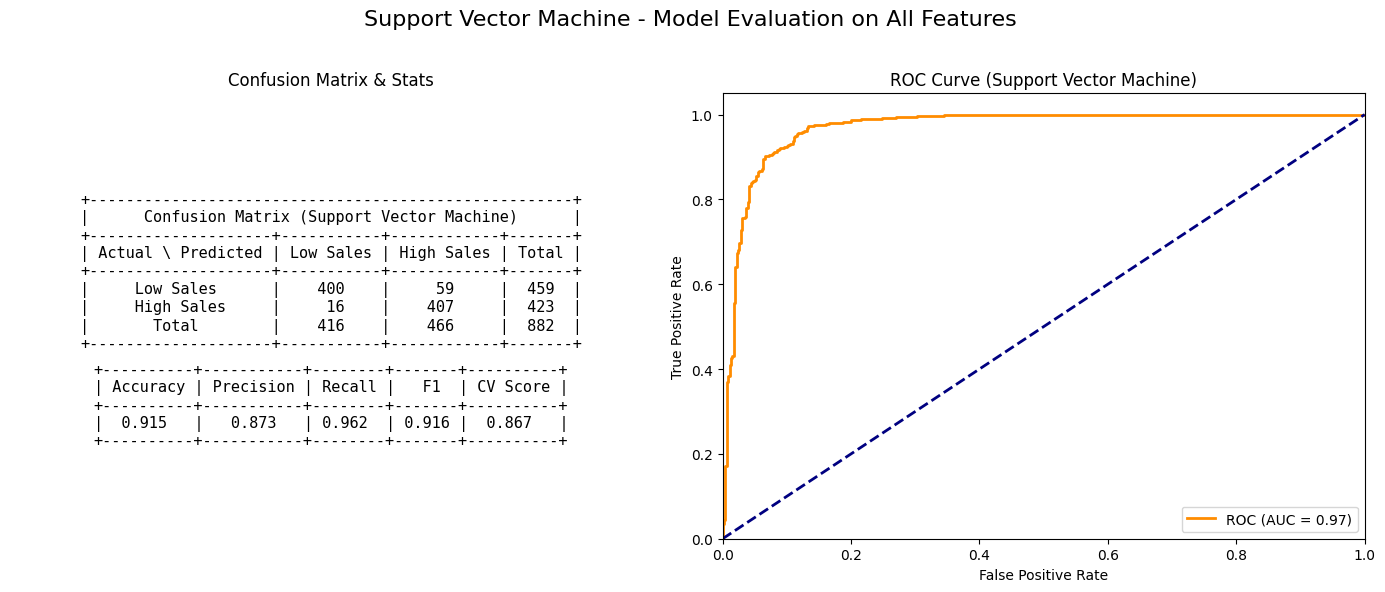

Unique in y_test: [False  True]
Unique in y_pred: [False  True]


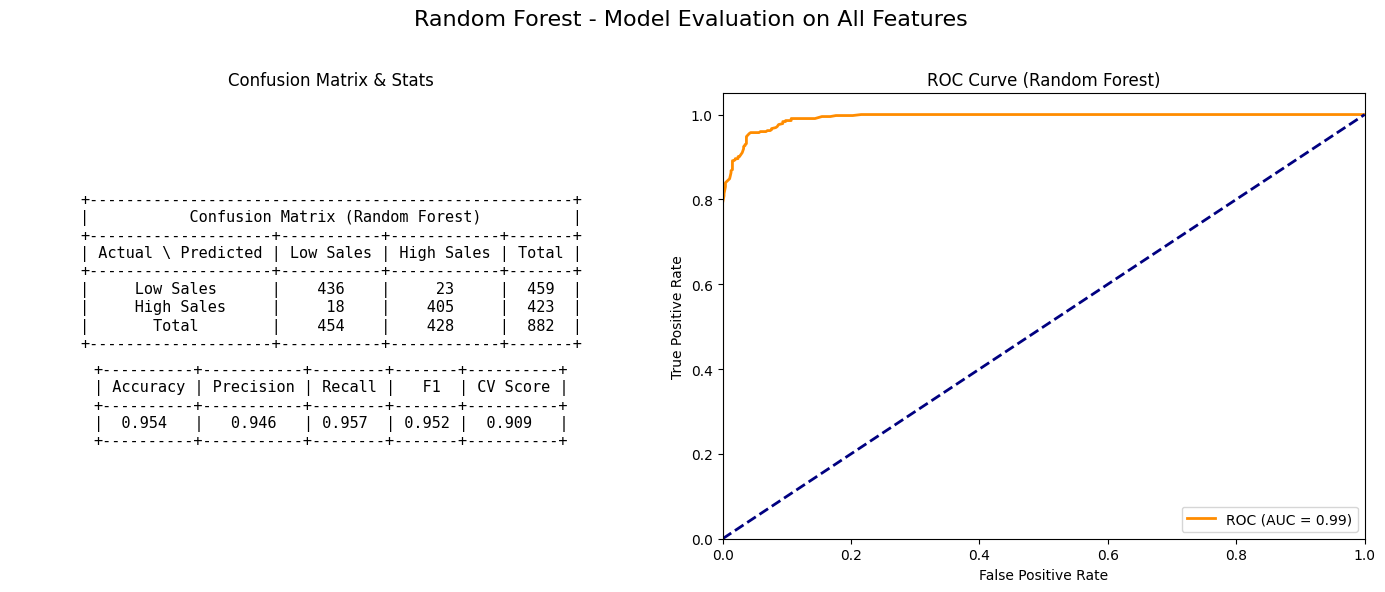

Unique in y_test: [False  True]
Unique in y_pred: [False  True]


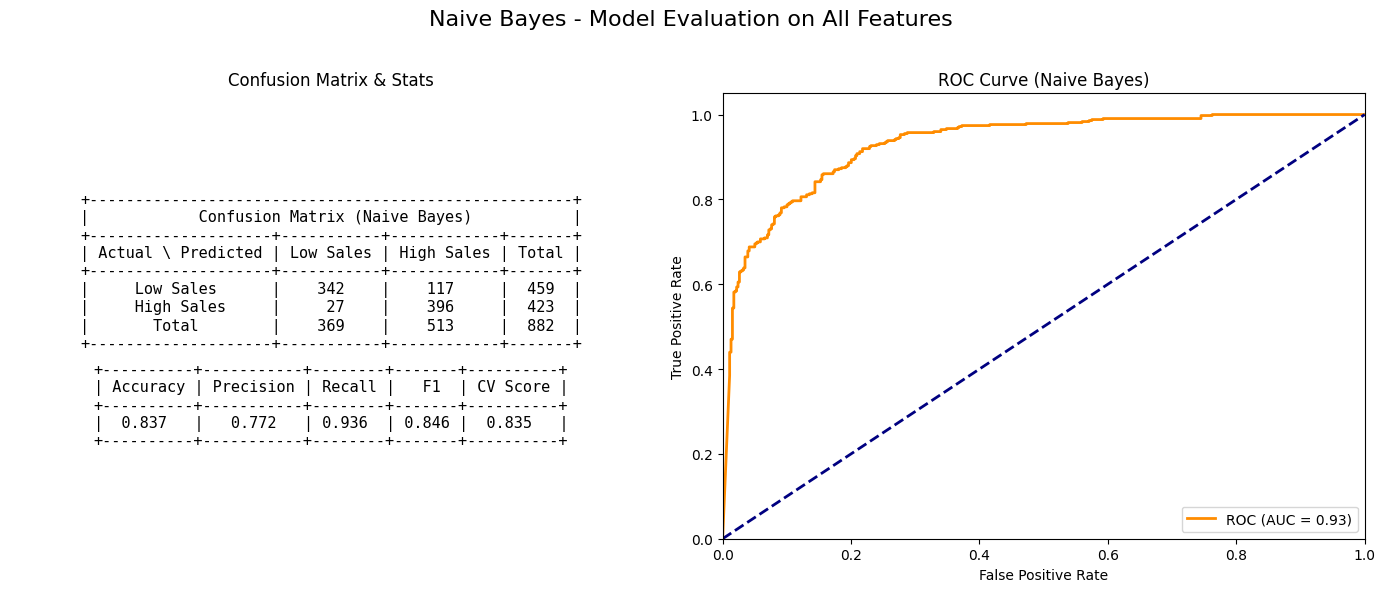

In [109]:
# K-Nearest Neighbors
model = KNeighborsClassifier()
classification_results = evaluate_classifier(model, 'K-Nearest Neighbors', classification_results)
# Logistic Regression
model = LogisticRegression()
classification_results = evaluate_classifier(model, 'Logistic Regression', classification_results)
# Decision Tree
model = DecisionTreeClassifier()
classification_results = evaluate_classifier(model, 'Decision Tree', classification_results)
# Support Vector Machine
model = SVC(probability=True)
classification_results = evaluate_classifier(model, 'Support Vector Machine', classification_results)
# Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classification_results = evaluate_classifier(model, 'Random Forest', classification_results)
# naïve bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
classification_results = evaluate_classifier(model, 'Naive Bayes', classification_results)

### Evaluation

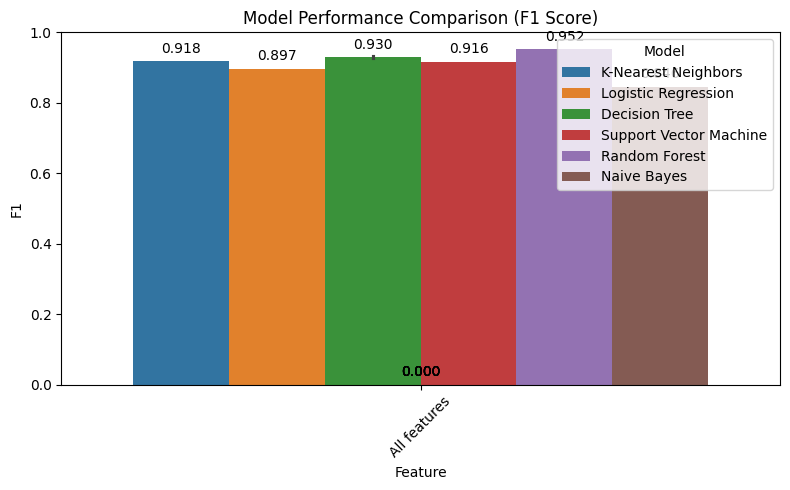

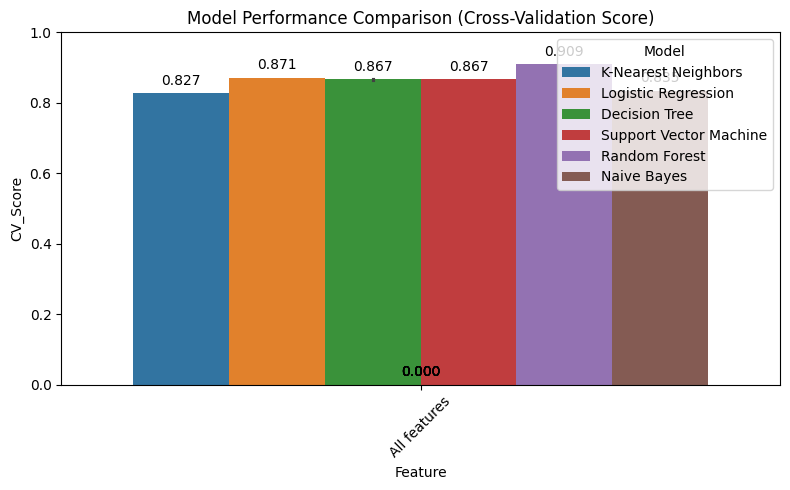

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert PrettyTable to DataFrame
df_results = pd.DataFrame(
    [row for row in classification_results._rows], 
    columns=classification_results.field_names
)

# Create comparative visualizations
plt.figure(figsize=(8, 5))
bar_plot = sns.barplot(data=df_results, x='Feature', y='F1', hue='Model')
plt.title('Model Performance Comparison (F1 Score)')
plt.ylim(0, 1)  # Set y-axis range from 0 to 1
plt.xticks(rotation=45)

# Add value labels on the bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.3f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

plt.tight_layout()
plt.show()


# with the CV score
plt.figure(figsize=(8, 5))
bar_plot = sns.barplot(data=df_results, x='Feature', y='CV_Score', hue='Model')
plt.title('Model Performance Comparison (Cross-Validation Score)')
plt.ylim(0, 1)  # Set y-axis range from 0 to 1
plt.xticks(rotation=45)

# Add value labels on the bars	
for p in bar_plot.patches:
	bar_plot.annotate(format(p.get_height(), '.3f'), 
					  (p.get_x() + p.get_width() / 2., p.get_height()), 
					  ha = 'center', va = 'center', 
					  xytext = (0, 9), 
					  textcoords = 'offset points')
 
plt.tight_layout()
plt.show()

## Regression


### Evaluation
